We will solve a **Poisson PDE** in 2D using FEniCS, and compare it with a known exact solution. We state the problem:
-Δu = f in Ω=(0,1)^2,
u=0 on ∂Ω.
For f=2π^2sin(πx)sin(πy),t he exact solution is u_exact(x,y)= sin(πx)sin(πy).

In [1]:
%%capture
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

In [2]:
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.9 MB/s eta 0:00:00


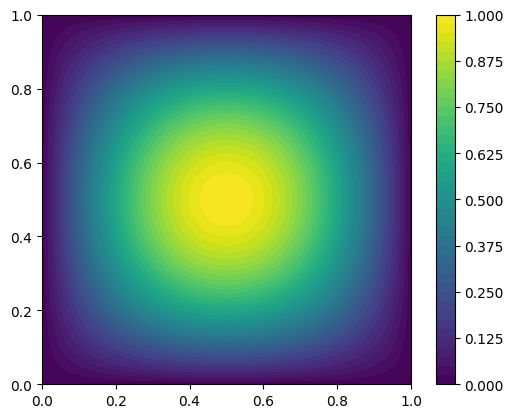

In [5]:
#Importing FEniCS and the required libraries
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import mshr

#Turn off logging
set_log_level(LogLevel.ERROR)  # Only show errors


#Define parameters
T = 1.0 #final time
num_steps = 100 #number of steps
τ = T/num_steps #time step


#Create mesh for a square domain
domain = mshr.Rectangle(Point(0.0,0.0),Point(1.0,1.0))
mesh = mshr.generate_mesh(domain, 48)


#Define a finite element function space
V = FunctionSpace(mesh, "CG", 1)

#Define the boundary
def boundary(x, on_boundary):
  return on_boundary

x = SpatialCoordinate(mesh)

#Pick a source, right-hand side term
f = 2*pi**2*sin(pi*x[0]) * sin(pi*x[1])

#Define boundary conditions: 0 Dirichlet condition on the whole boundary
boundary_condition = DirichletBC(V, Constant(0.0), boundary)

u = TrialFunction(V)      #u is the unknown
v = TestFunction(V)
u_sol = Function(V)

#Define the weak formulation
a = inner(grad(u),grad(v))*dx
L = f*v*dx
#Solve the PDE numerically
solve(a==L,u_sol,boundary_condition)

#Plot the solution
plot_obj = plot(u_sol)
plt.colorbar(plot_obj)
plt.show()

Now we can compare the numerical solution to the known, exact solution, u_exact(x,y)= sin(πx)sin(πy)

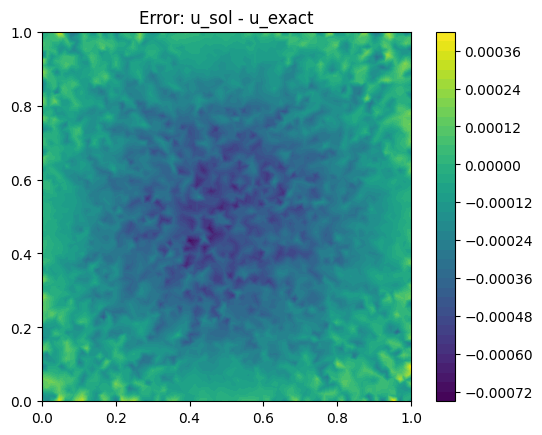

In [7]:
u_exact = sin(pi*x[0]) * sin(pi*x[1])

#Turn off logging
set_log_level(LogLevel.ERROR)  # Only show errors

e = project(u_sol - u_exact, V)
c = plot(e)
plt.colorbar(c)
plt.title("Error: u_sol - u_exact")
plt.show()
